In [1]:
#setup fastai notebook
!pip install -Uqq fastbook fastai
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 16.5MB/s 
     |████████████████████████████████| 194kB 59.9MB/s 
     |████████████████████████████████| 51kB 9.0MB/s 
     |████████████████████████████████| 1.1MB 55.4MB/s 
     |████████████████████████████████| 61kB 10.7MB/s 
Mounted at /content/gdrive


In [2]:
#@title imports
from fastbook import *
from fastai.vision.all import *

from fastprogress import fastprogress
from torchvision.models import *

In [3]:
# true for imagewoof, else imagenette
woof = True
if woof:
  path = untar_data(URLs.IMAGEWOOF)
else:
  path = untar_data(URLs.IMAGENETTE)

files = get_image_files(path/"train")
print("Training images: ", len(get_image_files(path/"train")),'(' ,round(len(get_image_files(path/"train"))*100/len(get_image_files(path)),2), '%)')
print("Validation images: ", len(get_image_files(path/"val")),'(' ,round(len(get_image_files(path/"val"))*100/len(get_image_files(path)),2), '%)')


Training images:  9025 ( 69.67 %)
Validation images:  3929 ( 30.33 %)


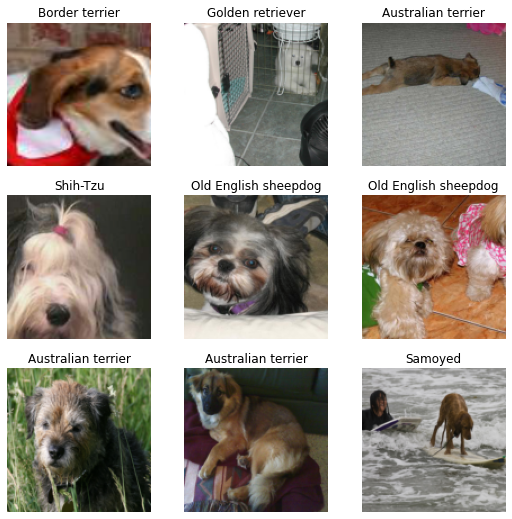

In [4]:
#get all the images
fnames = get_image_files(path)

#create dict to show better readable labels
if woof:
  lbl_dict = dict(
    n02093754='Australian terrier', 
    n02089973='Border terrier', 
    n02099601='Samoyed', 
    n02087394='Beagle', 
    n02105641='Shih-Tzu', 
    n02096294='English foxhound', 
    n02088364='Rhodesian ridgeback', 
    n02115641='Dingo', 
    n02111889='Golden retriever', 
    n02086240='Old English sheepdog'
  )
else:
  lbl_dict = dict(
    n01440764='tench',
    n02102040='English springer',
    n02979186='cassette player',
    n03000684='chain saw',
    n03028079='church',
    n03394916='French horn',
    n03417042='garbage truck',
    n03425413='gas pump',
    n03445777='golf ball',
    n03888257='parachute'
  )
#function to return human readable filenames
def label_func(fname):
  return lbl_dict[parent_label(fname)]



  #define a datablock
dblock = DataBlock(
      #set input to image and the goal to ctaegories
      blocks = (ImageBlock, CategoryBlock),
      #get names inside data block
      get_items = get_image_files,
      #label the items uin a readbale manner
      get_y=label_func,
      #split between test and trainining by folder two ages above
      splitter = GrandparentSplitter(valid_name='val'),
      #randomize the input & batch transform
      item_tfms = RandomResizedCrop(128, min_scale=0.35), 
      batch_tfms = Normalize.from_stats(*imagenet_stats)
      )

  #convert to dataloader
dls = dblock.dataloaders(path)
dls.show_batch()

Learning Rate (Optimization Function)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


epoch,train_loss,valid_loss,accuracy,time
0,1.996322,2.157481,0.273352,01:31
1,1.926347,1.794878,0.370578,01:32
2,1.822637,2.733382,0.265462,01:33
3,1.673319,1.563566,0.428862,01:33
4,1.463757,1.846281,0.393484,01:31
5,1.285884,1.161011,0.596335,01:31
6,1.099865,1.428829,0.553067,01:32
7,1.030713,1.007519,0.659455,01:32
8,0.916810,1.533474,0.534233,01:31
9,0.799131,0.816880,0.740646,01:31


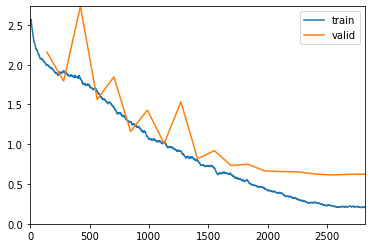

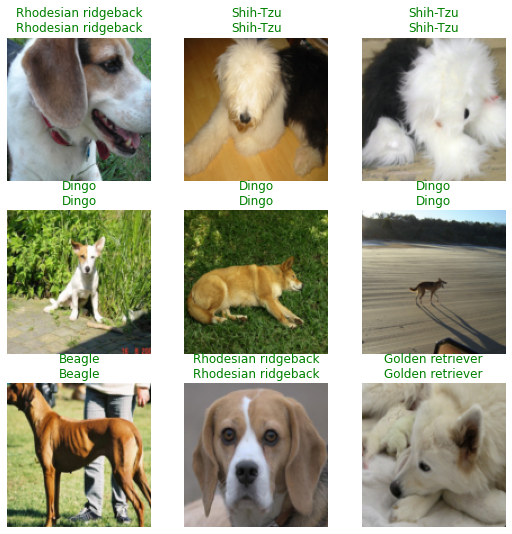

In [5]:
#test with ranger
#mount gdrive
from google.colab import drive
drive.mount('/content/gdrive')

#define the used model (here an optimized xresnet50)
model = xresnext50(n_out=10, sa=True, pool=MaxPool)

#the used optimization function, here ranger
optimizer = partial(ranger, mom=.95, sqr_mom=.99, eps=1e-6)

#additional model callbacks
callbacks = []

#add teh csv logger
callbacks.extend([CSVLogger(fname='ranger_logs.csv'),ShowGraphCallback()])
#define the learner
learn = Learner(dls, model, opt_func=optimizer, metrics=accuracy, cbs=callbacks, path= '/content/gdrive/MyDrive/Files')

#do the train
learn.fit_one_cycle(20, 8e-3)
#print the results
learn.show_results()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


epoch,train_loss,valid_loss,accuracy,time
0,1.983648,2.639076,0.244592,01:34
1,1.868290,2.462216,0.332400,01:34
2,1.710460,1.870414,0.345381,01:33
3,1.564699,1.638070,0.413591,01:32
4,1.388624,1.998570,0.420972,01:33
5,1.257523,1.385473,0.559175,01:32
6,1.133490,1.377479,0.557394,01:33
7,1.048328,1.225696,0.591245,01:32
8,0.946282,1.234321,0.593281,01:33
9,0.860042,1.044545,0.651820,01:33


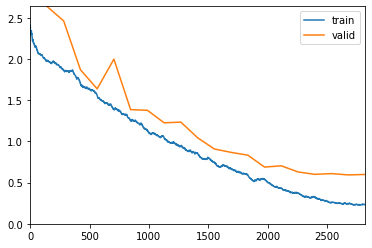

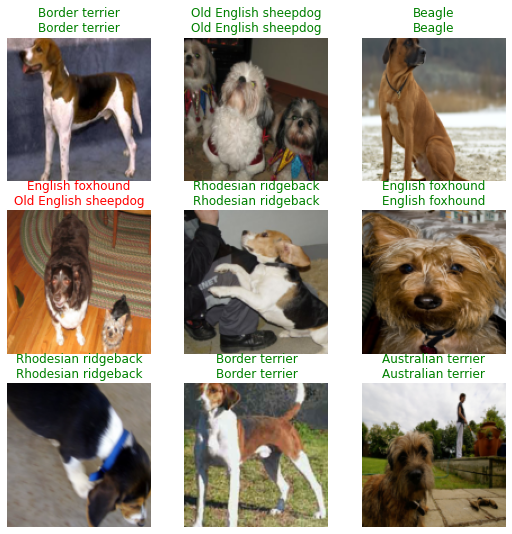

In [6]:
#test with Adam
#mount gdrive
from google.colab import drive
drive.mount('/content/gdrive')

#define the used model (here an optimized xresnet50)
model = xresnext50(n_out=10, sa=True, pool=MaxPool)

#the used optimization function, here adam
optimizer = partial(Adam, mom=.95, sqr_mom=.99, eps=1e-6)

#add teh csv logger
callbacks.extend([CSVLogger(fname='adam_logs.csv'),ShowGraphCallback()])
#define the learner
learn = Learner(dls, model, opt_func=optimizer, metrics=accuracy, cbs=callbacks, path= '/content/gdrive/MyDrive/Files')

#do the train
learn.fit_one_cycle(20, 8e-3)
#print the results
learn.show_results()


#EarlyStopping Callback

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


epoch,train_loss,valid_loss,accuracy,time
0,1.996998,2.456208,0.234156,01:30
1,1.911917,1.883211,0.351743,01:31
2,1.814328,2.122149,0.320438,01:31


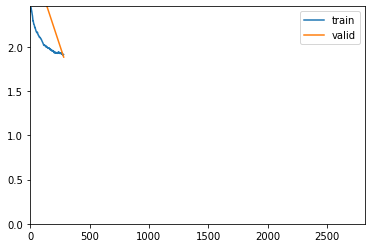

No improvement since epoch 1: early stopping


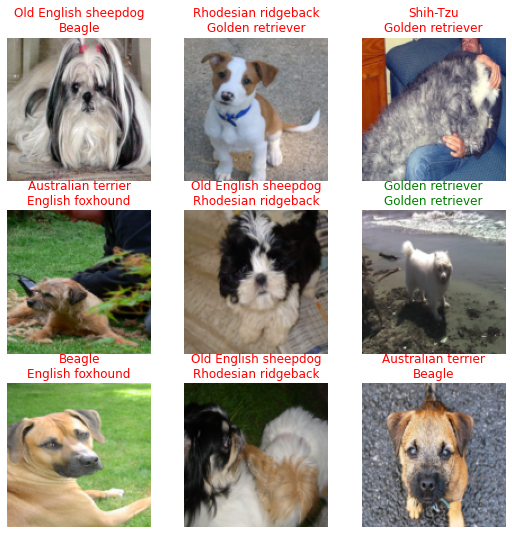

In [7]:
#test with ranger
#mount gdrive
from google.colab import drive
drive.mount('/content/gdrive')

#define the used model (here an optimized xresnet50)
model = xresnext50(n_out=10, sa=True, pool=MaxPool)

#the used optimization function, here ranger
optimizer = partial(ranger, mom=.95, sqr_mom=.99, eps=1e-6)

#additional model callbacks
callbacks = [EarlyStoppingCallback()]

#add teh csv logger
callbacks.extend([CSVLogger(fname='ranger_with_Earlystopping_logs.csv'),ShowGraphCallback()])
#define the learner
learn = Learner(dls, model, wd=0.3, opt_func=optimizer, metrics=accuracy, cbs=callbacks, path= '/content/gdrive/MyDrive/Files')

#do the train
learn.fit_one_cycle(20, 8e-3)
#print the results
learn.show_results()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


epoch,train_loss,valid_loss,accuracy,time
0,1.998720,2.707458,0.224485,01:32
1,1.890053,2.350487,0.268771,01:32
2,1.783037,2.069901,0.318402,01:31
3,1.665459,2.168513,0.312548,01:31


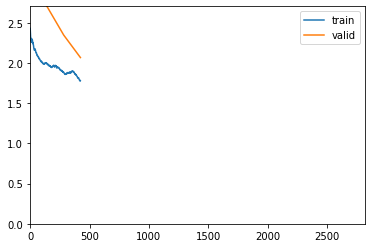

No improvement since epoch 2: early stopping


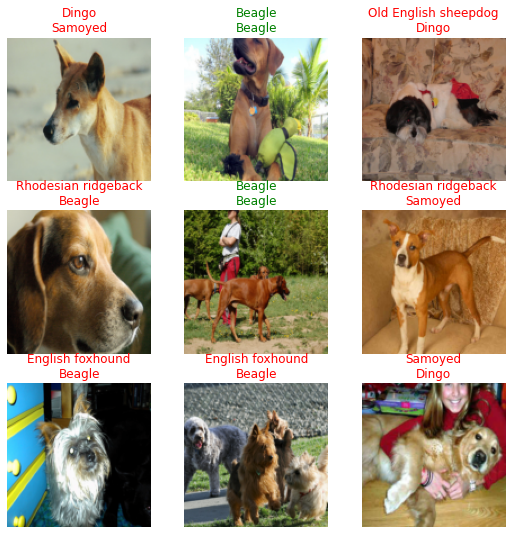

In [8]:
#test with adam
#mount gdrive
from google.colab import drive
drive.mount('/content/gdrive')

#define the used model (here an optimized xresnet50)
model = xresnext50(n_out=10, sa=True, pool=MaxPool)

#the used optimization function, here ranger
optimizer = partial(Adam, mom=.95, sqr_mom=.99, eps=1e-6)

#add teh csv logger
callbacks.extend([CSVLogger(fname='adam_with_Earlystopping_logs.csv'),ShowGraphCallback(),EarlyStoppingCallback()])
#define the learner
learn = Learner(dls, model, wd=0.3, opt_func=optimizer, metrics=accuracy, cbs=callbacks, path= '/content/gdrive/MyDrive/Files')

#do the train
learn.fit_one_cycle(20, 8e-3)
#print the results
learn.show_results()
